# Part-1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load Iris dataset
iris = load_iris()
df = iris.data[:, 2:4] 

In [4]:
df = pd.DataFrame(df, columns=['petal width', 'petal length'])

In [5]:
df.head()

,petal width,petal length
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Preprocessing

In [6]:
# Preprocessing: Standard Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
scaled_df = pd.DataFrame(scaled_df, columns=['petal width', 'petal length'])

In [8]:
scaled_df.head()

,petal width,petal length
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


### Would scaling  help here
Scaling helps ensure that features with larger scales don't disproportionately influence the clustering results. The fact that the scaled values are centered around 0 and have a standard deviation of 1 indicates that scaling has been performed correctly.

Since the petal width and petal length features have different units and scales, it's a good idea to perform scaling. This ensures that both features contribute equally to the clustering process. The decision to preprocess the data through scaling is **appropriate** in this context. 

### Elbow Plot

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

C:\Users\HP\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

In [10]:
inertia

[299.99999999999994,
 54.16878133149558,
 18.02696261254407,
 12.283372197379126,
 9.152134379409809,
 7.18831870297506,
 5.9985810153432055,
 5.130918624626857,
 4.395151212637795,
 3.8973988776735244]

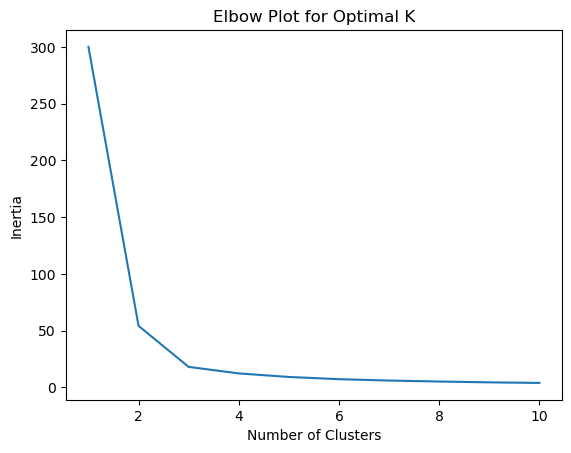

In [11]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal K')
plt.show()

### Value of k
The elbow plot shows a clear bend at k=2, it suggests that there's a significant change in the rate of inertia reduction at that point. This is a strong indication that you should consider using k=2 as the optimal number of clusters for your K-Means clustering.

Given the context of the Iris dataset and the fact that it contains three distinct species, the bend at k=2 might seem surprising. However, this result can occur due to the distribution of data points and the scaling of features. K-Means is sensitive to the distance between data points, and sometimes it can emphasize certain patterns in the data that don't directly correspond to the species labels.

# Part-2

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore

In [13]:
# Load Heart Disease dataset
df_2 = pd.read_csv('C:\\Users\HP\\Downloads\\archive (3)\\heart.csv')

In [14]:
df_2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
df_2.shape

(918, 12)

In [16]:
# Oulier removal by z score

In [17]:
mean=df_2.mean()
std=df_2.std()
z_scores = np.abs((df_2 - mean ) / std)
outliers =df_2[(z_scores < 3).all(axis=1)]

C:\Users\HP\AppData\Local\Temp\ipykernel_2040\2732124371.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=df_2.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_2040\2732124371.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=df_2.std()


In [18]:
outliers.shape

(0, 12)

In [19]:
# Convert text columns to numbers using label encoding

In [20]:
label_encoder = LabelEncoder()

In [21]:
df_2['ChestPainType'] = label_encoder.fit_transform(df_2['ChestPainType'])
df_2['RestingECG'] = label_encoder.fit_transform(df_2['RestingECG'])
df_2['ExerciseAngina'] = label_encoder.fit_transform(df_2['ExerciseAngina'])
df_2['ST_Slope'] = label_encoder.fit_transform(df_2['ST_Slope'])

In [22]:
# One Hot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
df_2=pd.get_dummies(df_2, columns = ['Sex'])

In [25]:
df_2.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [26]:
# Splitting into features and target
X = df_2.drop('HeartDisease', axis=1)
y = df_2['HeartDisease']

### Apply scaling

In [32]:
scaler = StandardScaler()
scaled_heart_data = scaler.fit_transform(X)

In [33]:
column_names = X.columns.tolist()

In [34]:
print(column_names)


['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Sex_F', 'Sex_M']


In [38]:
X=pd.DataFrame(scaled_heart_data, columns=column_names)

In [39]:
X.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_F,Sex_M
0,-1.433140,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,-0.515952,0.515952
1,-0.478484,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1.938163,-1.938163
2,-1.751359,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,-0.515952,0.515952
3,-0.584556,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1.938163,-1.938163
4,0.051881,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,-0.515952,0.515952


In [40]:
X.shape

(918, 12)

# Building Classification Models:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### SVM

In [45]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

### Logistic Regression

In [46]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

### Random Forest

In [47]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [48]:
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

SVM Accuracy: 0.84
Logistic Regression Accuracy: 0.85
Random Forest Accuracy: 0.89


### Best Model
The Random Forest model gives the best accuracy among the three models with an accuracy of 0.89. Therefore, for this specific dataset and the way we've trained and tested the models, the Random Forest model is performing the best in terms of accuracy.

# Applying PCA and Retraining Models

In [49]:
from sklearn.decomposition import PCA

In [51]:
# Apply PCA
pca = PCA(n_components=6)  # You can choose the number of components based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Retraining SVM Model with PCA-transformed data

In [53]:
svm_model_pca = SVC(kernel='linear', random_state=42)
svm_model_pca.fit(X_train_pca, y_train)
svm_pred_pca = svm_model_pca.predict(X_test_pca)
svm_accuracy_pca = accuracy_score(y_test, svm_pred_pca)

### Retraining Logistic Regression Model with PCA-transformed data

In [55]:
lr_model_pca = LogisticRegression(random_state=42)
lr_model_pca.fit(X_train_pca, y_train)
lr_pred_pca = lr_model_pca.predict(X_test_pca)
lr_accuracy_pca = accuracy_score(y_test, lr_pred_pca)

### Retraining Random Forest Model with PCA-transformed data

In [56]:
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
rf_pred_pca = rf_model_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)

In [57]:
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
rf_pred_pca = rf_model_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)

In [58]:
print(f'SVM Accuracy with PCA: {svm_accuracy_pca:.2f}')
print(f'Logistic Regression Accuracy with PCA: {lr_accuracy_pca:.2f}')
print(f'Random Forest Accuracy with PCA: {rf_accuracy_pca:.2f}')

SVM Accuracy with PCA: 0.85
Logistic Regression Accuracy with PCA: 0.85
Random Forest Accuracy with PCA: 0.85


# Pca Comparison
Result is satisfactory and can be used practically. The accuracy of all three models remained the same (0.85) after applying PCA. This suggests that the reduced dimensions from PCA were able to maintain the original accuracy level, indicating that the original features were already informative for the classification task.